<a href="https://colab.research.google.com/github/javermeire12/Simulations/blob/main/DESI_Landauer_Enhanced_Analysis_with_Results%20(Code%20Hidden).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# @title
# Cell 1: Setup and Imports - Landauer Enhanced
print("🚀 DESI LANDAUER ENHANCED ANALYSIS - INITIALIZING")
print("="*70)

import subprocess
import sys

def install_packages():
    """Install all required packages"""
    packages = [
        'astropy', 'healpy', 'networkx', 'scipy', 'matplotlib',
        'seaborn', 'pandas', 'numpy', 'requests', 'tqdm', 'scikit-learn'
    ]

    print("🔧 Installing packages for Landauer-enhanced analysis...")
    for package in packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✅ {package}")
        except:
            print(f"⚠️ {package} already installed or failed")

install_packages()

# Import all libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import norm, shapiro, kstest
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck18
import os
import json
from tqdm import tqdm
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Physical constants for Landauer calculations
k_B = 1.380649e-23  # Boltzmann constant (J/K)
T_cmb = 2.7  # Cosmic microwave background temperature (K)
h_planck = 6.62607015e-34  # Planck constant (J⋅s)

# Initialize analysis
ANALYSIS_START_TIME = time.time()
TIMESTAMP = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

print(f"✅ All packages imported successfully!")
print(f"📅 Landauer-enhanced analysis started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🎯 Physical constants loaded: k_B = {k_B:.3e} J/K, T_CMB = {T_cmb} K")
print("="*70)


🚀 DESI LANDAUER ENHANCED ANALYSIS - INITIALIZING
🔧 Installing packages for Landauer-enhanced analysis...
✅ astropy
✅ healpy
✅ networkx
✅ scipy
✅ matplotlib
✅ seaborn
✅ pandas
✅ numpy
✅ requests
✅ tqdm
✅ scikit-learn
✅ All packages imported successfully!
📅 Landauer-enhanced analysis started: 2025-07-04 17:38:05
🎯 Physical constants loaded: k_B = 1.381e-23 J/K, T_CMB = 2.7 K


In [11]:
# @title
# Cell 2: Landauer-Enhanced DESI Data Access
class LandauerEnhancedDataAccess:
    """Enhanced DESI data access with Landauer principle integration"""

    def __init__(self):
        self.k_B = 1.380649e-23  # Boltzmann constant (J/K)
        self.T_cmb = 2.7  # CMB temperature (K)

    def load_real_desi_data(self, filename='LRG_SGC_clustering.dat.fits', max_galaxies=10000):
        """Load real DESI .fits data with progress tracking"""
        print(f"🌌 Loading real DESI data from {filename}...")

        if not os.path.exists(filename):
            print(f"❌ Error: {filename} not found")
            print("Available DESI files should be:")
            print("   • LRG_SGC_clustering.dat.fits")
            print("   • LRG_NGC_clustering.dat.fits")
            print("   • QSO_SGC_clustering.dat.fits")
            print("   • QSO_NGC_clustering.dat.fits")
            return None

        try:
            print(f"🔓 Opening FITS file...")
            with fits.open(filename) as hdul:
                print(f"📥 Reading DESI data header...")
                data = hdul[1].data

                print(f"✅ DESI data loaded!")
                print(f"📊 Total galaxies in file: {len(data):,}")

                # CRITICAL: Chunk BEFORE coordinate conversion to avoid memory issues
                if len(data) > max_galaxies:
                    print(f"🔧 CHUNKING: File too large ({len(data):,} galaxies)")
                    print(f"   Randomly sampling {max_galaxies:,} galaxies to avoid memory overflow...")

                    # Random sampling of indices
                    indices = np.random.choice(len(data), max_galaxies, replace=False)
                    data = data[indices]
                    print(f"   ✅ Chunked to {len(data):,} galaxies")

                if 'RA' in data.dtype.names and 'DEC' in data.dtype.names and 'Z' in data.dtype.names:
                    print(f"🌍 Converting coordinates using Planck18 cosmology...")

                    ra = data['RA']
                    dec = data['DEC']
                    z = data['Z']

                    print(f"📊 Original data ranges:")
                    print(f"   RA: {ra.min():.2f} to {ra.max():.2f} degrees")
                    print(f"   DEC: {dec.min():.2f} to {dec.max():.2f} degrees")
                    print(f"   Z: {z.min():.4f} to {z.max():.4f}")

                    # Filter valid redshifts
                    valid_mask = (z >= 0.01) & (z <= 3.0)
                    ra_valid = ra[valid_mask]
                    dec_valid = dec[valid_mask]
                    z_valid = z[valid_mask]

                    print(f"✅ Valid galaxies: {len(z_valid):,}")

                    # Use proper Planck18 cosmology for DESI
                    cosmo = Planck18
                    print(f"🌌 Using Planck18: H0={cosmo.H0}, Om0={cosmo.Om0:.4f}")

                    # Calculate proper comoving distances
                    distances_mpc = cosmo.comoving_distance(z_valid).value

                    print(f"📏 Distance range: {distances_mpc.min():.1f} to {distances_mpc.max():.1f} Mpc")
                    print(f"📏 Mean distance: {distances_mpc.mean():.1f} Mpc")

                    # Create sky coordinates and convert to Cartesian
                    coords = SkyCoord(
                        ra=ra_valid * u.degree,
                        dec=dec_valid * u.degree,
                        distance=distances_mpc * u.Mpc
                    )

                    cartesian = coords.cartesian
                    galaxy_positions = np.column_stack([
                        cartesian.x.to(u.Mpc).value,
                        cartesian.y.to(u.Mpc).value,
                        cartesian.z.to(u.Mpc).value
                    ])

                    # Data is already chunked above if needed
                    print(f"💾 Final dataset: {len(galaxy_positions):,} galaxies")
                    memory_gb = (len(galaxy_positions)**2 * 8) / (1024**3)
                    print(f"📊 Estimated memory requirement: {memory_gb:.1f} GB for distance matrix")

                    print(f"🎯 SUCCESS: {len(galaxy_positions):,} DESI galaxies ready!")
                    print(f"📊 Coordinate ranges:")
                    print(f"   X: {galaxy_positions[:,0].min():.1f} to {galaxy_positions[:,0].max():.1f} Mpc")
                    print(f"   Y: {galaxy_positions[:,1].min():.1f} to {galaxy_positions[:,1].max():.1f} Mpc")
                    print(f"   Z: {galaxy_positions[:,2].min():.1f} to {galaxy_positions[:,2].max():.1f} Mpc")

                    return galaxy_positions

        except Exception as e:
            print(f"❌ Error loading DESI data: {e}")
            return None

# Initialize data access
desi_data = LandauerEnhancedDataAccess()
print("✅ Landauer-Enhanced DESI Data Access ready!")


✅ Landauer-Enhanced DESI Data Access ready!


In [12]:
# @title
# Cell 3: Execute DESI Data Loading
print("🚀 EXECUTING REAL DESI DATA LOADING")
print("="*60)

def estimate_memory_requirements(n_galaxies):
    """Estimate memory requirements for analysis"""
    # Distance matrix: n×n float64 = 8 bytes per element
    distance_matrix_gb = (n_galaxies**2 * 8) / (1024**3)

    # Network analysis memory (rough estimate)
    network_memory_gb = distance_matrix_gb * 1.5  # Additional overhead

    return distance_matrix_gb, network_memory_gb

print("💾 MEMORY ESTIMATION FOR DESI FILES:")
print("   Full DESI files contain 100k-500k+ galaxies")
print("   Memory requirements scale as O(n²) for distance calculations")

for n in [10000, 25000, 50000, 100000]:
    dist_mem, net_mem = estimate_memory_requirements(n)
    print(f"   {n:6,} galaxies → {dist_mem:5.1f} GB distance matrix, {net_mem:5.1f} GB total")

print("   🎯 Using 10,000 galaxies for optimal performance/memory balance")
print("="*60)

# Try different DESI files in order of preference
desi_files = [
    'LRG_SGC_clustering.dat.fits',  # Preferred: Southern Galactic Cap LRGs
    'LRG_NGC_clustering.dat.fits',  # Alternative: Northern Galactic Cap LRGs
    'QSO_SGC_clustering.dat.fits',  # Alternative: Quasars (SGC)
    'QSO_NGC_clustering.dat.fits'   # Alternative: Quasars (NGC)
]

galaxy_positions = None
loaded_file = None

for filename in desi_files:
    if os.path.exists(filename):
        print(f"🎯 Found {filename} - attempting to load...")
        galaxy_positions = desi_data.load_real_desi_data(filename, max_galaxies=10000)
        if galaxy_positions is not None:
            loaded_file = filename
            break

if galaxy_positions is None:
    print("❌ CRITICAL ERROR: No DESI data files found!")
    print("Expected files in current directory:")
    for f in desi_files:
        print(f"   • {f}")
    print("\nPlease ensure DESI .fits files are in the current directory.")
    DATA_LOADED = False
else:
    DATA_LOADED = True
    print(f"\n🎉 SUCCESS: Loaded {len(galaxy_positions):,} galaxies from {loaded_file}")
    print(f"📊 Position ranges:")
    print(f"   X: [{galaxy_positions[:,0].min():.1f}, {galaxy_positions[:,0].max():.1f}] Mpc")
    print(f"   Y: [{galaxy_positions[:,1].min():.1f}, {galaxy_positions[:,1].max():.1f}] Mpc")
    print(f"   Z: [{galaxy_positions[:,2].min():.1f}, {galaxy_positions[:,2].max():.1f}] Mpc")

    # Calculate basic statistics
    distances_from_origin = np.sqrt(np.sum(galaxy_positions**2, axis=1))
    print(f"📏 Distance from origin: {distances_from_origin.min():.1f} to {distances_from_origin.max():.1f} Mpc")
    print(f"📏 Mean distance: {distances_from_origin.mean():.1f} Mpc")

print(f"\n✅ Data loading complete! Status: {'READY' if DATA_LOADED else 'FAILED'}")
print("="*60)


🚀 EXECUTING REAL DESI DATA LOADING
💾 MEMORY ESTIMATION FOR DESI FILES:
   Full DESI files contain 100k-500k+ galaxies
   Memory requirements scale as O(n²) for distance calculations
   10,000 galaxies →   0.7 GB distance matrix,   1.1 GB total
   25,000 galaxies →   4.7 GB distance matrix,   7.0 GB total
   50,000 galaxies →  18.6 GB distance matrix,  27.9 GB total
   100,000 galaxies →  74.5 GB distance matrix, 111.8 GB total
   🎯 Using 10,000 galaxies for optimal performance/memory balance
🎯 Found LRG_SGC_clustering.dat.fits - attempting to load...
🌌 Loading real DESI data from LRG_SGC_clustering.dat.fits...
🔓 Opening FITS file...
📥 Reading DESI data header...
✅ DESI data loaded!
📊 Total galaxies in file: 662,492
🔧 CHUNKING: File too large (662,492 galaxies)
   Randomly sampling 10,000 galaxies to avoid memory overflow...
   ✅ Chunked to 10,000 galaxies
🌍 Converting coordinates using Planck18 cosmology...
📊 Original data ranges:
   RA: 0.00 to 360.00 degrees
   DEC: -19.17 to 33.23 d

In [13]:
# @title
# Cell 4: Landauer-Enhanced Cosmic Network Analyzer
class LandauerCosmicNetworkAnalyzer:
    """Cosmic network analyzer enhanced with Landauer's principle calculations"""

    def __init__(self, radius=100.0):  # Default cosmological scale
        self.radius = radius
        self.k_B = k_B  # Boltzmann constant
        self.T_cmb = T_cmb  # CMB temperature
        self.results = {}

    def calculate_phase_space_volume(self, positions, G):
        """Calculate phase space volume using spatial extent and network configuration"""
        print("   📐 Calculating phase space volume...")

        # Spatial volume (3D bounding box)
        mins = positions.min(axis=0)
        maxs = positions.max(axis=0)
        spatial_volume = np.prod(maxs - mins)

        # Network configuration space
        n_nodes = len(positions)
        possible_edges = n_nodes * (n_nodes - 1) // 2
        actual_edges = G.number_of_edges()

        # Phase space = spatial × configuration
        # Using logarithmic compression for tractable numbers
        log_spatial_vol = np.log10(spatial_volume + 1)
        config_fraction = actual_edges / possible_edges if possible_edges > 0 else 0

        phase_space_metric = log_spatial_vol * config_fraction

        print(f"   🌌 Spatial volume: {spatial_volume:.2e} Mpc³")
        print(f"   🔗 Edge density: {config_fraction:.6f} ({actual_edges}/{possible_edges})")
        print(f"   📊 Phase space metric: {phase_space_metric:.4f}")

        return {
            'spatial_volume': spatial_volume,
            'edge_density': config_fraction,
            'phase_space_metric': phase_space_metric,
            'n_edges': actual_edges,
            'n_possible_edges': possible_edges
        }

    def calculate_landauer_energy(self, n_bits, temperature=None):
        """Calculate minimum energy cost per Landauer's principle"""
        if temperature is None:
            temperature = self.T_cmb

        # E = k_B * T * ln(2) * N_bits
        energy_per_bit = self.k_B * temperature * np.log(2)
        total_energy = energy_per_bit * n_bits

        print(f"   ⚡ Landauer energy cost:")
        print(f"      Temperature: {temperature} K")
        print(f"      Energy per bit: {energy_per_bit:.2e} J")
        print(f"      Total energy ({n_bits} bits): {total_energy:.2e} J")

        return {
            'energy_per_bit': energy_per_bit,
            'total_energy': total_energy,
            'n_bits': n_bits,
            'temperature': temperature
        }

    def calculate_information_geometry_coupling(self, positions, G):
        """Calculate information-geometry coupling strength"""
        print("   🔗 Calculating information-geometry coupling...")

        # Information content (Shannon entropy of edge weights)
        edges = list(G.edges(data=True))
        if len(edges) > 0:
            weights = np.array([edge[2].get('weight', 1.0) for edge in edges])
            # Normalize weights to probabilities
            if weights.sum() > 0:
                probs = weights / weights.sum()
                # Calculate Shannon entropy
                shannon_entropy = -np.sum(probs * np.log2(probs + 1e-12))
            else:
                shannon_entropy = 0.0
        else:
            shannon_entropy = 0.0

        # Geometric information (clustering coefficient)
        clustering = nx.average_clustering(G, weight='weight') if G.number_of_edges() > 0 else 0.0

        # Information-geometry coupling
        coupling_strength = shannon_entropy * clustering if clustering > 0 else 0.0

        print(f"   📊 Shannon entropy: {shannon_entropy:.4f} bits")
        print(f"   🌐 Clustering coefficient: {clustering:.6f}")
        print(f"   🔗 Coupling strength: {coupling_strength:.6f}")

        return {
            'shannon_entropy': shannon_entropy,
            'clustering_coefficient': clustering,
            'coupling_strength': coupling_strength
        }

    def build_cosmic_network(self, positions):
        """Build cosmic network with progress tracking"""
        print(f"   🌌 Building cosmic network (r={self.radius} Mpc)...")

        n = len(positions)
        G = nx.Graph()
        G.add_nodes_from(range(n))

        # Efficient distance calculation
        print("   📏 Calculating distances...")
        distances = cdist(positions, positions)

        # Add edges with progress bar
        edge_count = 0
        for i in tqdm(range(n), desc="   Building network", leave=False):
            for j in range(i+1, n):
                dist = distances[i, j]
                if dist <= self.radius and dist > 0:
                    # Use inverse square law for weights (gravitational analog)
                    weight = 1.0 / (dist * dist + 1e-6)  # Small epsilon to avoid division by zero
                    G.add_edge(i, j, weight=weight, distance=dist)
                    edge_count += 1

        print(f"   ✅ Network complete: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
        return G

    def analyze_cosmic_network_with_landauer(self, positions, n_random_tests=30):
        """Complete Landauer-enhanced cosmic network analysis"""
        print(f"🔬 LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS")
        print(f"   Radius: {self.radius} Mpc")
        print(f"   Galaxies: {len(positions):,}")
        print(f"   Random tests: {n_random_tests}")

        # Build observed network
        print("\\n📊 OBSERVED UNIVERSE NETWORK:")
        G_observed = self.build_cosmic_network(positions)

        # Phase space analysis
        phase_space_obs = self.calculate_phase_space_volume(positions, G_observed)

        # Landauer energy calculation
        n_bits_obs = G_observed.number_of_edges()  # Each edge represents 1 bit
        landauer_obs = self.calculate_landauer_energy(n_bits_obs)

        # Information-geometry coupling
        coupling_obs = self.calculate_information_geometry_coupling(positions, G_observed)

        # Random network comparison
        print("\\n🎲 RANDOM NETWORK COMPARISON:")
        random_results = {
            'phase_space': [],
            'landauer_energy': [],
            'coupling_strength': [],
            'edge_counts': []
        }

        for i in tqdm(range(n_random_tests), desc="Random tests"):
            # Generate random positions in same volume
            mins = positions.min(axis=0)
            maxs = positions.max(axis=0)
            random_pos = np.random.uniform(mins, maxs, positions.shape)

            # Build random network
            G_random = self.build_cosmic_network(random_pos)

            # Calculate metrics
            phase_random = self.calculate_phase_space_volume(random_pos, G_random)
            n_bits_random = G_random.number_of_edges()
            landauer_random = self.calculate_landauer_energy(n_bits_random)
            coupling_random = self.calculate_information_geometry_coupling(random_pos, G_random)

            # Store results
            random_results['phase_space'].append(phase_random['phase_space_metric'])
            random_results['landauer_energy'].append(landauer_random['total_energy'])
            random_results['coupling_strength'].append(coupling_random['coupling_strength'])
            random_results['edge_counts'].append(n_bits_random)

        # Statistical analysis
        print("\\n📈 STATISTICAL ANALYSIS:")

        # Phase space efficiency
        random_phase_mean = np.mean(random_results['phase_space'])
        random_phase_std = np.std(random_results['phase_space'])
        phase_z_score = (phase_space_obs['phase_space_metric'] - random_phase_mean) / random_phase_std if random_phase_std > 0 else 0

        # Energy efficiency
        random_energy_mean = np.mean(random_results['landauer_energy'])
        random_energy_std = np.std(random_results['landauer_energy'])
        energy_z_score = (landauer_obs['total_energy'] - random_energy_mean) / random_energy_std if random_energy_std > 0 else 0

        # Coupling efficiency
        random_coupling_mean = np.mean(random_results['coupling_strength'])
        random_coupling_std = np.std(random_results['coupling_strength'])
        coupling_z_score = (coupling_obs['coupling_strength'] - random_coupling_mean) / random_coupling_std if random_coupling_std > 0 else 0

        # Edge count efficiency
        random_edges_mean = np.mean(random_results['edge_counts'])
        random_edges_std = np.std(random_results['edge_counts'])
        edges_z_score = (n_bits_obs - random_edges_mean) / random_edges_std if random_edges_std > 0 else 0

        print(f"   🌌 Phase space efficiency: {phase_z_score:.2f}σ")
        print(f"   ⚡ Energy efficiency: {energy_z_score:.2f}σ")
        print(f"   🔗 Coupling efficiency: {coupling_z_score:.2f}σ")
        print(f"   📊 Edge count efficiency: {edges_z_score:.2f}σ")

        # Compile results
        results = {
            'observed': {
                'phase_space': phase_space_obs,
                'landauer_energy': landauer_obs,
                'coupling': coupling_obs,
                'network_size': G_observed.number_of_edges()
            },
            'random_comparison': {
                'phase_space_z': phase_z_score,
                'energy_z': energy_z_score,
                'coupling_z': coupling_z_score,
                'edges_z': edges_z_score,
                'random_stats': random_results
            },
            'parameters': {
                'radius': self.radius,
                'n_galaxies': len(positions),
                'n_random_tests': n_random_tests
            }
        }

        self.results = results
        return results

print("✅ Landauer-Enhanced Cosmic Network Analyzer ready!")


✅ Landauer-Enhanced Cosmic Network Analyzer ready!


In [14]:
# @title
# Cell 5: Execute Landauer-Enhanced Analysis
if not DATA_LOADED:
    print("🚨 ANALYSIS BLOCKED - NO DATA LOADED!")
    print("Please run the data loading cells first.")
else:
    print("🚀 EXECUTING LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS")
    print("="*70)

    # Initialize analyzer with cosmological scale
    cosmological_radii = [100, 150, 200, 250, 300]  # Mpc - cosmic web scales

    print(f"📊 Dataset: {len(galaxy_positions):,} REAL DESI galaxies from {loaded_file}")
    print(f"🔬 Testing cosmological radii: {cosmological_radii} Mpc")
    print(f"🌌 Integrating Landauer's principle with cosmic network analysis")
    print(f"⏱️ Estimated time: ~{len(cosmological_radii) * 5} minutes")

    landauer_results = {}
    analysis_start = time.time()

    for i, radius in enumerate(cosmological_radii):
        print(f"\\n{'='*60}")
        print(f"🔬 RADIUS {i+1}/{len(cosmological_radii)}: {radius} Mpc")
        print(f"{'='*60}")

        # Create analyzer for this radius
        analyzer = LandauerCosmicNetworkAnalyzer(radius=radius)

        # Run complete Landauer-enhanced analysis
        radius_start = time.time()
        result = analyzer.analyze_cosmic_network_with_landauer(
            galaxy_positions,
            n_random_tests=25  # Reduced for speed but still robust
        )
        radius_time = time.time() - radius_start

        # Store results
        landauer_results[radius] = result

        # Interpret significance
        max_z = max(
            abs(result['random_comparison']['phase_space_z']),
            abs(result['random_comparison']['energy_z']),
            abs(result['random_comparison']['coupling_z']),
            abs(result['random_comparison']['edges_z'])
        )

        if max_z > 5:
            significance = "🚀 DISCOVERY (>5σ)"
        elif max_z > 3:
            significance = "⭐ STRONG EVIDENCE (>3σ)"
        elif max_z > 2:
            significance = "✅ MODERATE EVIDENCE (>2σ)"
        else:
            significance = "⚠️ WEAK EVIDENCE (<2σ)"

        print(f"\\n🎯 LANDAUER ANALYSIS RESULT: {significance}")
        print(f"   Maximum Z-score: {max_z:.1f}σ")
        print(f"   Phase space efficiency: {result['random_comparison']['phase_space_z']:.1f}σ")
        print(f"   Energy efficiency: {result['random_comparison']['energy_z']:.1f}σ")
        print(f"   Information coupling: {result['random_comparison']['coupling_z']:.1f}σ")
        print(f"   Network connectivity: {result['random_comparison']['edges_z']:.1f}σ")

        # Progress tracking
        elapsed = time.time() - analysis_start
        remaining = elapsed / (i + 1) * (len(cosmological_radii) - i - 1)
        print(f"   ⏱️ Radius completed in {radius_time/60:.1f}m")
        print(f"   📊 Progress: {i+1}/{len(cosmological_radii)} ({elapsed/60:.1f}m elapsed, {remaining/60:.1f}m remaining)")

    total_time = time.time() - analysis_start

    print(f"\\n🎯 LANDAUER-ENHANCED ANALYSIS COMPLETE!")
    print(f"⏱️ Total analysis time: {total_time/60:.1f} minutes")
    print(f"📊 Analyzed {len(cosmological_radii)} cosmological scales")
    print(f"🔬 Results stored in landauer_results dictionary")
    print("="*70)


🚀 EXECUTING LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS
📊 Dataset: 10,000 REAL DESI galaxies from LRG_SGC_clustering.dat.fits
🔬 Testing cosmological radii: [100, 150, 200, 250, 300] Mpc
🌌 Integrating Landauer's principle with cosmic network analysis
⏱️ Estimated time: ~25 minutes
\n============================================================
🔬 RADIUS 1/5: 100 Mpc
🔬 LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS
   Radius: 100 Mpc
   Galaxies: 10,000
   Random tests: 25
\n📊 OBSERVED UNIVERSE NETWORK:
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...


   ✅ Network complete: 10000 nodes, 17503 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000350 (17503/49995000)
   📊 Phase space metric: 0.0038
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (17503 bits): 4.52e-19 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 11.7228 bits
   🌐 Clustering coefficient: 0.000632
   🔗 Coupling strength: 0.007405
\n🎲 RANDOM NETWORK COMPARISON:


Random tests:   0%|          | 0/25 [00:00<?, ?it/s]

   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:   4%|▍         | 1/25 [00:17<06:49, 17.07s/it]

   ✅ Network complete: 10000 nodes, 3530 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000071 (3530/49995000)
   📊 Phase space metric: 0.0008
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3530 bits): 9.12e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.8093 bits
   🌐 Clustering coefficient: 0.000621
   🔗 Coupling strength: 0.006717
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:   8%|▊         | 2/25 [00:31<05:51, 15.27s/it]

   ✅ Network complete: 10000 nodes, 3482 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000070 (3482/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3482 bits): 9.00e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.5382 bits
   🌐 Clustering coefficient: 0.000432
   🔗 Coupling strength: 0.004554
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  12%|█▏        | 3/25 [00:45<05:22, 14.66s/it]

   ✅ Network complete: 10000 nodes, 3476 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000070 (3476/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3476 bits): 8.98e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 9.7492 bits
   🌐 Clustering coefficient: 0.000112
   🔗 Coupling strength: 0.001093
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  16%|█▌        | 4/25 [00:59<05:05, 14.54s/it]

   ✅ Network complete: 10000 nodes, 3551 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000071 (3551/49995000)
   📊 Phase space metric: 0.0008
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3551 bits): 9.18e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.6849 bits
   🌐 Clustering coefficient: 0.000648
   🔗 Coupling strength: 0.006919
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  20%|██        | 5/25 [01:13<04:49, 14.46s/it]

   ✅ Network complete: 10000 nodes, 3433 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3433/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3433 bits): 8.87e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.8720 bits
   🌐 Clustering coefficient: 0.001245
   🔗 Coupling strength: 0.013538
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  24%|██▍       | 6/25 [01:29<04:41, 14.82s/it]

   ✅ Network complete: 10000 nodes, 3523 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000070 (3523/49995000)
   📊 Phase space metric: 0.0008
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3523 bits): 9.10e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 11.0458 bits
   🌐 Clustering coefficient: 0.002153
   🔗 Coupling strength: 0.023778
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  28%|██▊       | 7/25 [01:46<04:40, 15.59s/it]

   ✅ Network complete: 10000 nodes, 3439 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3439/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3439 bits): 8.89e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.8713 bits
   🌐 Clustering coefficient: 0.000814
   🔗 Coupling strength: 0.008849
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  32%|███▏      | 8/25 [02:00<04:17, 15.18s/it]

   ✅ Network complete: 10000 nodes, 3452 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3452/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3452 bits): 8.92e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.3798 bits
   🌐 Clustering coefficient: 0.000263
   🔗 Coupling strength: 0.002733
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9536/10000 [00:13<00:00, 3446.11it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 3448 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3448/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3448 bits): 8.91e-20 J
   🔗 Calculating information-geometry coupling...


Random tests:  36%|███▌      | 9/25 [02:15<03:59, 14.99s/it]

   📊 Shannon entropy: 10.7709 bits
   🌐 Clustering coefficient: 0.000644
   🔗 Coupling strength: 0.006941
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  40%|████      | 10/25 [02:29<03:41, 14.80s/it]

   ✅ Network complete: 10000 nodes, 3547 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000071 (3547/49995000)
   📊 Phase space metric: 0.0008
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3547 bits): 9.17e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.9310 bits
   🌐 Clustering coefficient: 0.001402
   🔗 Coupling strength: 0.015330
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  44%|████▍     | 11/25 [02:44<03:25, 14.70s/it]

   ✅ Network complete: 10000 nodes, 3429 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3429/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3429 bits): 8.86e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 9.5436 bits
   🌐 Clustering coefficient: 0.000210
   🔗 Coupling strength: 0.002003
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  48%|████▊     | 12/25 [02:58<03:10, 14.63s/it]

   ✅ Network complete: 10000 nodes, 3511 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000070 (3511/49995000)
   📊 Phase space metric: 0.0008
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3511 bits): 9.07e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.5948 bits
   🌐 Clustering coefficient: 0.000968
   🔗 Coupling strength: 0.010255
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  52%|█████▏    | 13/25 [03:13<02:56, 14.68s/it]

   ✅ Network complete: 10000 nodes, 3421 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000068 (3421/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3421 bits): 8.84e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.4121 bits
   🌐 Clustering coefficient: 0.000177
   🔗 Coupling strength: 0.001846
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  56%|█████▌    | 14/25 [03:29<02:44, 14.98s/it]

   ✅ Network complete: 10000 nodes, 3421 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000068 (3421/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3421 bits): 8.84e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.6545 bits
   🌐 Clustering coefficient: 0.000260
   🔗 Coupling strength: 0.002770
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  60%|██████    | 15/25 [03:44<02:29, 15.00s/it]

   ✅ Network complete: 10000 nodes, 3473 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3473/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3473 bits): 8.97e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.7961 bits
   🌐 Clustering coefficient: 0.001211
   🔗 Coupling strength: 0.013079
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  64%|██████▍   | 16/25 [04:00<02:19, 15.52s/it]

   ✅ Network complete: 10000 nodes, 3443 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3443/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3443 bits): 8.90e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.2358 bits
   🌐 Clustering coefficient: 0.000182
   🔗 Coupling strength: 0.001865
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  68%|██████▊   | 17/25 [04:15<02:03, 15.38s/it]

   ✅ Network complete: 10000 nodes, 3464 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3464/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3464 bits): 8.95e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.3708 bits
   🌐 Clustering coefficient: 0.000268
   🔗 Coupling strength: 0.002783
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  72%|███████▏  | 18/25 [04:30<01:46, 15.25s/it]

   ✅ Network complete: 10000 nodes, 3434 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3434/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3434 bits): 8.87e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.1194 bits
   🌐 Clustering coefficient: 0.000161
   🔗 Coupling strength: 0.001632
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  76%|███████▌  | 19/25 [04:45<01:31, 15.19s/it]

   ✅ Network complete: 10000 nodes, 3413 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000068 (3413/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3413 bits): 8.82e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.1990 bits
   🌐 Clustering coefficient: 0.000257
   🔗 Coupling strength: 0.002626
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  80%|████████  | 20/25 [05:01<01:17, 15.42s/it]

   ✅ Network complete: 10000 nodes, 3368 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000067 (3368/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3368 bits): 8.70e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.8076 bits
   🌐 Clustering coefficient: 0.000631
   🔗 Coupling strength: 0.006822
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  84%|████████▍ | 21/25 [05:17<01:01, 15.48s/it]

   ✅ Network complete: 10000 nodes, 3581 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000072 (3581/49995000)
   📊 Phase space metric: 0.0008
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3581 bits): 9.25e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.6869 bits
   🌐 Clustering coefficient: 0.000458
   🔗 Coupling strength: 0.004892
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  88%|████████▊ | 22/25 [05:33<00:46, 15.53s/it]

   ✅ Network complete: 10000 nodes, 3420 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000068 (3420/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3420 bits): 8.84e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.8275 bits
   🌐 Clustering coefficient: 0.000881
   🔗 Coupling strength: 0.009540
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  92%|█████████▏| 23/25 [05:48<00:30, 15.47s/it]

   ✅ Network complete: 10000 nodes, 3442 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000069 (3442/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3442 bits): 8.89e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.2074 bits
   🌐 Clustering coefficient: 0.000172
   🔗 Coupling strength: 0.001758
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests:  96%|█████████▌| 24/25 [06:03<00:15, 15.48s/it]

   ✅ Network complete: 10000 nodes, 3507 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000070 (3507/49995000)
   📊 Phase space metric: 0.0008
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3507 bits): 9.06e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 10.9399 bits
   🌐 Clustering coefficient: 0.001841
   🔗 Coupling strength: 0.020139
   🌌 Building cosmic network (r=100 Mpc)...
   📏 Calculating distances...



Random tests: 100%|██████████| 25/25 [06:19<00:00, 15.19s/it]


   ✅ Network complete: 10000 nodes, 3423 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000068 (3423/49995000)
   📊 Phase space metric: 0.0007
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (3423 bits): 8.84e-20 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 9.5152 bits
   🌐 Clustering coefficient: 0.000094
   🔗 Coupling strength: 0.000892
\n📈 STATISTICAL ANALYSIS:
   🌌 Phase space efficiency: 275.88σ
   ⚡ Energy efficiency: 275.90σ
   🔗 Coupling efficiency: 0.08σ
   📊 Edge count efficiency: 275.90σ
\n🎯 LANDAUER ANALYSIS RESULT: 🚀 DISCOVERY (>5σ)
   Maximum Z-score: 275.9σ
   Phase space efficiency: 275.9σ
   Energy efficiency: 275.9σ
   Information coupling: 0.1σ
   Network connectivity: 275.9σ
   ⏱️ Radius completed in 6.9m
   📊 Progress: 1/5 (6.9m elapsed, 27.6m remaining)
\n============================================================
🔬 RADIUS 2/5

   ✅ Network complete: 10000 nodes, 53709 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001074 (53709/49995000)
   📊 Phase space metric: 0.0116
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (53709 bits): 1.39e-18 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 13.2219 bits
   🌐 Clustering coefficient: 0.000342
   🔗 Coupling strength: 0.004517
\n🎲 RANDOM NETWORK COMPARISON:


Random tests:   0%|          | 0/25 [00:00<?, ?it/s]

   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  93%|█████████▎| 9289/10000 [00:15<00:00, 2727.64it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11481 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000230 (11481/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11481 bits): 2.97e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:   4%|▍         | 1/25 [00:16<06:27, 16.15s/it]

   📊 Shannon entropy: 11.1354 bits
   🌐 Clustering coefficient: 0.000167
   🔗 Coupling strength: 0.001855
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9686/10000 [00:15<00:00, 3485.77it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11436 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000229 (11436/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11436 bits): 2.95e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:   8%|▊         | 2/25 [00:32<06:10, 16.12s/it]

   📊 Shannon entropy: 12.4985 bits
   🌐 Clustering coefficient: 0.002063
   🔗 Coupling strength: 0.025786
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9487/10000 [00:15<00:00, 2956.94it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11605 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000232 (11605/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11605 bits): 3.00e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  12%|█▏        | 3/25 [00:48<05:53, 16.07s/it]

   📊 Shannon entropy: 12.5537 bits
   🌐 Clustering coefficient: 0.002167
   🔗 Coupling strength: 0.027207
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9565/10000 [00:15<00:00, 2301.34it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11731 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000235 (11731/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11731 bits): 3.03e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  16%|█▌        | 4/25 [01:05<05:43, 16.38s/it]

   📊 Shannon entropy: 12.4916 bits
   🌐 Clustering coefficient: 0.002136
   🔗 Coupling strength: 0.026676
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  92%|█████████▏| 9206/10000 [00:15<00:00, 2689.34it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11396 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000228 (11396/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11396 bits): 2.94e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  20%|██        | 5/25 [01:22<05:32, 16.62s/it]

   📊 Shannon entropy: 12.3542 bits
   🌐 Clustering coefficient: 0.001776
   🔗 Coupling strength: 0.021936
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  99%|█████████▊| 9858/10000 [00:15<00:00, 3882.51it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11386 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000228 (11386/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11386 bits): 2.94e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  24%|██▍       | 6/25 [01:38<05:13, 16.49s/it]

   📊 Shannon entropy: 12.5370 bits
   🌐 Clustering coefficient: 0.002987
   🔗 Coupling strength: 0.037445
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  92%|█████████▏| 9212/10000 [00:15<00:00, 2661.19it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11719 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000234 (11719/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11719 bits): 3.03e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  28%|██▊       | 7/25 [01:54<04:56, 16.46s/it]

   📊 Shannon entropy: 12.5309 bits
   🌐 Clustering coefficient: 0.002259
   🔗 Coupling strength: 0.028310
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9676/10000 [00:15<00:00, 3480.04it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11482 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000230 (11482/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11482 bits): 2.97e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  32%|███▏      | 8/25 [02:11<04:39, 16.43s/it]

   📊 Shannon entropy: 12.0151 bits
   🌐 Clustering coefficient: 0.000475
   🔗 Coupling strength: 0.005710
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9778/10000 [00:16<00:00, 2514.39it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11594 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000232 (11594/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11594 bits): 3.00e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  36%|███▌      | 9/25 [02:29<04:31, 16.94s/it]

   📊 Shannon entropy: 12.4548 bits
   🌐 Clustering coefficient: 0.000972
   🔗 Coupling strength: 0.012100
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  99%|█████████▉| 9913/10000 [00:15<00:00, 3896.51it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11465 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000229 (11465/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11465 bits): 2.96e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  40%|████      | 10/25 [02:46<04:13, 16.90s/it]

   📊 Shannon entropy: 12.1816 bits
   🌐 Clustering coefficient: 0.000419
   🔗 Coupling strength: 0.005106
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9473/10000 [00:15<00:00, 3058.54it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11596 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000232 (11596/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11596 bits): 3.00e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  44%|████▍     | 11/25 [03:02<03:56, 16.89s/it]

   📊 Shannon entropy: 12.3917 bits
   🌐 Clustering coefficient: 0.000690
   🔗 Coupling strength: 0.008556
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9623/10000 [00:19<00:00, 2254.61it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11701 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000234 (11701/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11701 bits): 3.02e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  48%|████▊     | 12/25 [03:23<03:54, 18.06s/it]

   📊 Shannon entropy: 12.3809 bits
   🌐 Clustering coefficient: 0.000569
   🔗 Coupling strength: 0.007039
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9382/10000 [00:16<00:00, 2622.03it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11430 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000229 (11430/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11430 bits): 2.95e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  52%|█████▏    | 13/25 [03:41<03:35, 17.98s/it]

   📊 Shannon entropy: 12.1459 bits
   🌐 Clustering coefficient: 0.000623
   🔗 Coupling strength: 0.007564
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9679/10000 [00:16<00:00, 3398.54it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11605 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000232 (11605/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11605 bits): 3.00e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  56%|█████▌    | 14/25 [03:58<03:15, 17.77s/it]

   📊 Shannon entropy: 12.2496 bits
   🌐 Clustering coefficient: 0.000883
   🔗 Coupling strength: 0.010822
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▎| 9355/10000 [00:16<00:00, 2782.21it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11525 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000231 (11525/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11525 bits): 2.98e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  60%|██████    | 15/25 [04:15<02:55, 17.53s/it]

   📊 Shannon entropy: 12.4078 bits
   🌐 Clustering coefficient: 0.001289
   🔗 Coupling strength: 0.015988
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9434/10000 [00:17<00:00, 2035.64it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11583 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000232 (11583/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11583 bits): 2.99e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  64%|██████▍   | 16/25 [04:34<02:39, 17.78s/it]

   📊 Shannon entropy: 12.5434 bits
   🌐 Clustering coefficient: 0.002660
   🔗 Coupling strength: 0.033366
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  93%|█████████▎| 9313/10000 [00:17<00:00, 2674.25it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11680 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000234 (11680/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11680 bits): 3.02e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  68%|██████▊   | 17/25 [04:52<02:24, 18.05s/it]

   📊 Shannon entropy: 12.3984 bits
   🌐 Clustering coefficient: 0.000993
   🔗 Coupling strength: 0.012312
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  99%|█████████▉| 9886/10000 [00:16<00:00, 3765.12it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11536 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000231 (11536/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11536 bits): 2.98e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  72%|███████▏  | 18/25 [05:10<02:06, 18.11s/it]

   📊 Shannon entropy: 11.7153 bits
   🌐 Clustering coefficient: 0.000207
   🔗 Coupling strength: 0.002420
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9461/10000 [00:16<00:00, 2352.08it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11711 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000234 (11711/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11711 bits): 3.03e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  76%|███████▌  | 19/25 [05:29<01:48, 18.11s/it]

   📊 Shannon entropy: 12.5802 bits
   🌐 Clustering coefficient: 0.002074
   🔗 Coupling strength: 0.026090
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▎| 9358/10000 [00:17<00:00, 2670.81it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11562 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000231 (11562/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11562 bits): 2.99e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  80%|████████  | 20/25 [05:48<01:31, 18.39s/it]

   📊 Shannon entropy: 12.4062 bits
   🌐 Clustering coefficient: 0.001108
   🔗 Coupling strength: 0.013741
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9406/10000 [00:17<00:00, 2774.99it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11615 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000232 (11615/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11615 bits): 3.00e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  84%|████████▍ | 21/25 [06:06<01:14, 18.52s/it]

   📊 Shannon entropy: 12.4207 bits
   🌐 Clustering coefficient: 0.002148
   🔗 Coupling strength: 0.026676
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▎| 9351/10000 [00:16<00:00, 2661.12it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11614 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000232 (11614/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11614 bits): 3.00e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  88%|████████▊ | 22/25 [06:24<00:55, 18.34s/it]

   📊 Shannon entropy: 12.5300 bits
   🌐 Clustering coefficient: 0.002617
   🔗 Coupling strength: 0.032795
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9693/10000 [00:18<00:00, 2543.91it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11454 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000229 (11454/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11454 bits): 2.96e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  92%|█████████▏| 23/25 [06:44<00:37, 18.67s/it]

   📊 Shannon entropy: 9.6678 bits
   🌐 Clustering coefficient: 0.000062
   🔗 Coupling strength: 0.000600
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9606/10000 [00:17<00:00, 3166.38it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11558 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000231 (11558/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11558 bits): 2.99e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  96%|█████████▌| 24/25 [07:02<00:18, 18.62s/it]

   📊 Shannon entropy: 12.5289 bits
   🌐 Clustering coefficient: 0.002520
   🔗 Coupling strength: 0.031568
   🌌 Building cosmic network (r=150 Mpc)...
   📏 Calculating distances...



   Building network: 100%|█████████▉| 9968/10000 [00:17<00:00, 3937.53it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 11565 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000231 (11565/49995000)
   📊 Phase space metric: 0.0025
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (11565 bits): 2.99e-19 J
   🔗 Calculating information-geometry coupling...


Random tests: 100%|██████████| 25/25 [07:21<00:00, 17.64s/it]

   📊 Shannon entropy: 12.4818 bits
   🌐 Clustering coefficient: 0.001706
   🔗 Coupling strength: 0.021290
\n📈 STATISTICAL ANALYSIS:
   🌌 Phase space efficiency: 422.92σ
   ⚡ Energy efficiency: 422.83σ
   🔗 Coupling efficiency: -1.19σ
   📊 Edge count efficiency: 422.83σ
\n🎯 LANDAUER ANALYSIS RESULT: 🚀 DISCOVERY (>5σ)
   Maximum Z-score: 422.9σ
   Phase space efficiency: 422.9σ
   Energy efficiency: 422.8σ
   Information coupling: -1.2σ
   Network connectivity: 422.8σ
   ⏱️ Radius completed in 7.6m
   📊 Progress: 2/5 (14.6m elapsed, 21.8m remaining)
\n============================================================
🔬 RADIUS 3/5: 200 Mpc
🔬 LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS
   Radius: 200 Mpc
   Galaxies: 10,000
   Random tests: 25
\n📊 OBSERVED UNIVERSE NETWORK:
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...


   ✅ Network complete: 10000 nodes, 119908 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.002398 (119908/49995000)
   📊 Phase space metric: 0.0258
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (119908 bits): 3.10e-18 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 14.3517 bits
   🌐 Clustering coefficient: 0.000191
   🔗 Coupling strength: 0.002746
\n🎲 RANDOM NETWORK COMPARISON:


Random tests:   0%|          | 0/25 [00:00<?, ?it/s]

   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9787/10000 [00:17<00:00, 3477.26it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27058 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000541 (27058/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27058 bits): 6.99e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:   4%|▍         | 1/25 [00:19<07:40, 19.18s/it]

   📊 Shannon entropy: 13.3389 bits
   🌐 Clustering coefficient: 0.000302
   🔗 Coupling strength: 0.004024
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9790/10000 [00:18<00:00, 3257.17it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26580 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000532 (26580/49995000)
   📊 Phase space metric: 0.0057
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26580 bits): 6.87e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:   8%|▊         | 2/25 [00:39<07:42, 20.09s/it]

   📊 Shannon entropy: 13.6480 bits
   🌐 Clustering coefficient: 0.002033
   🔗 Coupling strength: 0.027748
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  93%|█████████▎| 9266/10000 [00:17<00:00, 2351.00it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27025 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000541 (27025/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27025 bits): 6.98e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  12%|█▏        | 3/25 [00:59<07:12, 19.64s/it]

   📊 Shannon entropy: 13.2942 bits
   🌐 Clustering coefficient: 0.000323
   🔗 Coupling strength: 0.004294
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  99%|█████████▉| 9903/10000 [00:18<00:00, 2936.01it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27042 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000541 (27042/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27042 bits): 6.99e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  16%|█▌        | 4/25 [01:19<07:02, 20.14s/it]

   📊 Shannon entropy: 13.5645 bits
   🌐 Clustering coefficient: 0.000746
   🔗 Coupling strength: 0.010119
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9464/10000 [00:18<00:00, 2479.72it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27155 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000543 (27155/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27155 bits): 7.02e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  20%|██        | 5/25 [01:39<06:38, 19.92s/it]

   📊 Shannon entropy: 13.6016 bits
   🌐 Clustering coefficient: 0.001323
   🔗 Coupling strength: 0.017999
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  93%|█████████▎| 9289/10000 [00:18<00:00, 2471.02it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27025 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000541 (27025/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27025 bits): 6.98e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  24%|██▍       | 6/25 [01:59<06:17, 19.88s/it]

   📊 Shannon entropy: 13.6852 bits
   🌐 Clustering coefficient: 0.001704
   🔗 Coupling strength: 0.023317
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  93%|█████████▎| 9299/10000 [00:19<00:00, 2298.35it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26896 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000538 (26896/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26896 bits): 6.95e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  28%|██▊       | 7/25 [02:20<06:07, 20.41s/it]

   📊 Shannon entropy: 13.7809 bits
   🌐 Clustering coefficient: 0.002571
   🔗 Coupling strength: 0.035432
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9566/10000 [00:18<00:00, 2609.33it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26952 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000539 (26952/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26952 bits): 6.96e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  32%|███▏      | 8/25 [02:40<05:44, 20.24s/it]

   📊 Shannon entropy: 13.5053 bits
   🌐 Clustering coefficient: 0.001095
   🔗 Coupling strength: 0.014782
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9579/10000 [00:20<00:00, 2308.31it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27288 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000546 (27288/49995000)
   📊 Phase space metric: 0.0059
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27288 bits): 7.05e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  36%|███▌      | 9/25 [03:02<05:31, 20.72s/it]

   📊 Shannon entropy: 13.3536 bits
   🌐 Clustering coefficient: 0.000430
   🔗 Coupling strength: 0.005738
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9678/10000 [00:18<00:00, 2716.77it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26921 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000538 (26921/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26921 bits): 6.96e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  40%|████      | 10/25 [03:22<05:07, 20.47s/it]

   📊 Shannon entropy: 13.6162 bits
   🌐 Clustering coefficient: 0.000903
   🔗 Coupling strength: 0.012293
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9521/10000 [00:19<00:00, 2079.82it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27291 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000546 (27291/49995000)
   📊 Phase space metric: 0.0059
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27291 bits): 7.05e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  44%|████▍     | 11/25 [03:43<04:50, 20.76s/it]

   📊 Shannon entropy: 13.0487 bits
   🌐 Clustering coefficient: 0.000231
   🔗 Coupling strength: 0.003016
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  92%|█████████▏| 9226/10000 [00:21<00:00, 2322.78it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27189 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000544 (27189/49995000)
   📊 Phase space metric: 0.0059
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27189 bits): 7.03e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  48%|████▊     | 12/25 [04:07<04:40, 21.59s/it]

   📊 Shannon entropy: 13.5980 bits
   🌐 Clustering coefficient: 0.000830
   🔗 Coupling strength: 0.011289
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▋| 9628/10000 [00:20<00:00, 2211.41it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27161 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000543 (27161/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27161 bits): 7.02e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  52%|█████▏    | 13/25 [04:29<04:21, 21.81s/it]

   📊 Shannon entropy: 13.6239 bits
   🌐 Clustering coefficient: 0.000999
   🔗 Coupling strength: 0.013607
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9438/10000 [00:19<00:00, 2495.73it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27138 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000543 (27138/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27138 bits): 7.01e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  56%|█████▌    | 14/25 [04:50<03:57, 21.56s/it]

   📊 Shannon entropy: 13.7078 bits
   🌐 Clustering coefficient: 0.001961
   🔗 Coupling strength: 0.026885
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9597/10000 [00:20<00:00, 2095.79it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26906 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000538 (26906/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26906 bits): 6.95e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  60%|██████    | 15/25 [05:13<03:38, 21.89s/it]

   📊 Shannon entropy: 13.6439 bits
   🌐 Clustering coefficient: 0.001489
   🔗 Coupling strength: 0.020316
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9597/10000 [00:19<00:00, 2788.03it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27220 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000544 (27220/49995000)
   📊 Phase space metric: 0.0059
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27220 bits): 7.03e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  64%|██████▍   | 16/25 [05:34<03:14, 21.58s/it]

   📊 Shannon entropy: 13.5126 bits
   🌐 Clustering coefficient: 0.001053
   🔗 Coupling strength: 0.014226
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9456/10000 [00:20<00:00, 2011.80it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27115 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000542 (27115/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27115 bits): 7.01e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  68%|██████▊   | 17/25 [05:56<02:55, 21.99s/it]

   📊 Shannon entropy: 12.3684 bits
   🌐 Clustering coefficient: 0.000146
   🔗 Coupling strength: 0.001807
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  93%|█████████▎| 9259/10000 [00:19<00:00, 1869.34it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26954 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000539 (26954/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26954 bits): 6.96e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  72%|███████▏  | 18/25 [06:18<02:32, 21.85s/it]

   📊 Shannon entropy: 13.7031 bits
   🌐 Clustering coefficient: 0.002562
   🔗 Coupling strength: 0.035105
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9403/10000 [00:20<00:00, 1857.45it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26610 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000532 (26610/49995000)
   📊 Phase space metric: 0.0057
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26610 bits): 6.88e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  76%|███████▌  | 19/25 [06:41<02:13, 22.22s/it]

   📊 Shannon entropy: 13.5047 bits
   🌐 Clustering coefficient: 0.000903
   🔗 Coupling strength: 0.012192
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9560/10000 [00:20<00:00, 2724.32it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27192 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000544 (27192/49995000)
   📊 Phase space metric: 0.0059
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27192 bits): 7.03e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  80%|████████  | 20/25 [07:03<01:50, 22.06s/it]

   📊 Shannon entropy: 13.6815 bits
   🌐 Clustering coefficient: 0.002119
   🔗 Coupling strength: 0.028994
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9597/10000 [00:22<00:00, 2020.02it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27125 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000543 (27125/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27125 bits): 7.01e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  84%|████████▍ | 21/25 [07:27<01:30, 22.62s/it]

   📊 Shannon entropy: 13.7717 bits
   🌐 Clustering coefficient: 0.001603
   🔗 Coupling strength: 0.022071
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9430/10000 [00:20<00:00, 2222.73it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26988 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000540 (26988/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26988 bits): 6.97e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  88%|████████▊ | 22/25 [07:49<01:07, 22.53s/it]

   📊 Shannon entropy: 13.7268 bits
   🌐 Clustering coefficient: 0.001781
   🔗 Coupling strength: 0.024447
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9519/10000 [00:22<00:00, 2215.93it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27359 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000547 (27359/49995000)
   📊 Phase space metric: 0.0059
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27359 bits): 7.07e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  92%|█████████▏| 23/25 [08:13<00:46, 23.04s/it]

   📊 Shannon entropy: 13.6347 bits
   🌐 Clustering coefficient: 0.001277
   🔗 Coupling strength: 0.017406
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9458/10000 [00:20<00:00, 2461.08it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 27170 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000543 (27170/49995000)
   📊 Phase space metric: 0.0059
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (27170 bits): 7.02e-19 J
   🔗 Calculating information-geometry coupling...


Random tests:  96%|█████████▌| 24/25 [08:36<00:23, 23.00s/it]

   📊 Shannon entropy: 13.7508 bits
   🌐 Clustering coefficient: 0.001407
   🔗 Coupling strength: 0.019354
   🌌 Building cosmic network (r=200 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9510/10000 [00:21<00:00, 2541.30it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 26767 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.000535 (26767/49995000)
   📊 Phase space metric: 0.0058
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (26767 bits): 6.92e-19 J
   🔗 Calculating information-geometry coupling...


Random tests: 100%|██████████| 25/25 [08:59<00:00, 21.59s/it]

   📊 Shannon entropy: 12.5293 bits
   🌐 Clustering coefficient: 0.000127
   🔗 Coupling strength: 0.001586
\n📈 STATISTICAL ANALYSIS:
   🌌 Phase space efficiency: 485.75σ
   ⚡ Energy efficiency: 485.92σ
   🔗 Coupling efficiency: -1.38σ
   📊 Edge count efficiency: 485.92σ
\n🎯 LANDAUER ANALYSIS RESULT: 🚀 DISCOVERY (>5σ)
   Maximum Z-score: 485.9σ
   Phase space efficiency: 485.7σ
   Energy efficiency: 485.9σ
   Information coupling: -1.4σ
   Network connectivity: 485.9σ
   ⏱️ Radius completed in 9.4m
   📊 Progress: 3/5 (24.0m elapsed, 16.0m remaining)
\n============================================================
🔬 RADIUS 4/5: 250 Mpc
🔬 LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS
   Radius: 250 Mpc
   Galaxies: 10,000
   Random tests: 25
\n📊 OBSERVED UNIVERSE NETWORK:
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...


   ✅ Network complete: 10000 nodes, 225263 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.004506 (225263/49995000)
   📊 Phase space metric: 0.0485
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (225263 bits): 5.82e-18 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 15.2664 bits
   🌐 Clustering coefficient: 0.000121
   🔗 Coupling strength: 0.001853
\n🎲 RANDOM NETWORK COMPARISON:


Random tests:   0%|          | 0/25 [00:00<?, ?it/s]

   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9681/10000 [00:23<00:00, 2481.32it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52295 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001046 (52295/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52295 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:   4%|▍         | 1/25 [00:26<10:32, 26.34s/it]

   📊 Shannon entropy: 14.5767 bits
   🌐 Clustering coefficient: 0.000500
   🔗 Coupling strength: 0.007284
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9461/10000 [00:22<00:00, 1900.45it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52251 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001045 (52251/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52251 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:   8%|▊         | 2/25 [00:52<10:04, 26.28s/it]

   📊 Shannon entropy: 14.2021 bits
   🌐 Clustering coefficient: 0.000248
   🔗 Coupling strength: 0.003522
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9401/10000 [00:21<00:00, 2040.44it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52073 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001042 (52073/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52073 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  12%|█▏        | 3/25 [01:17<09:25, 25.72s/it]

   📊 Shannon entropy: 14.6564 bits
   🌐 Clustering coefficient: 0.001574
   🔗 Coupling strength: 0.023064
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▎| 9351/10000 [00:22<00:00, 2068.23it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51817 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001036 (51817/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51817 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  16%|█▌        | 4/25 [01:42<08:55, 25.52s/it]

   📊 Shannon entropy: 14.4873 bits
   🌐 Clustering coefficient: 0.000434
   🔗 Coupling strength: 0.006284
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9561/10000 [00:23<00:00, 2238.29it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51695 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001034 (51695/49995000)
   📊 Phase space metric: 0.0111
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51695 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  20%|██        | 5/25 [02:09<08:42, 26.10s/it]

   📊 Shannon entropy: 14.1460 bits
   🌐 Clustering coefficient: 0.000161
   🔗 Coupling strength: 0.002281
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9505/10000 [00:23<00:00, 2186.97it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51792 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001036 (51792/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51792 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  24%|██▍       | 6/25 [02:37<08:22, 26.46s/it]

   📊 Shannon entropy: 14.2790 bits
   🌐 Clustering coefficient: 0.000336
   🔗 Coupling strength: 0.004796
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9472/10000 [00:23<00:00, 1939.42it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51637 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001033 (51637/49995000)
   📊 Phase space metric: 0.0111
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51637 bits): 1.33e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  28%|██▊       | 7/25 [03:03<07:58, 26.57s/it]

   📊 Shannon entropy: 14.2940 bits
   🌐 Clustering coefficient: 0.000222
   🔗 Coupling strength: 0.003168
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9463/10000 [00:23<00:00, 1685.54it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52361 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001047 (52361/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52361 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  32%|███▏      | 8/25 [03:31<07:35, 26.78s/it]

   📊 Shannon entropy: 14.1913 bits
   🌐 Clustering coefficient: 0.000191
   🔗 Coupling strength: 0.002711
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9765/10000 [00:23<00:00, 2697.20it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51891 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001038 (51891/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51891 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  36%|███▌      | 9/25 [03:58<07:08, 26.81s/it]

   📊 Shannon entropy: 14.4270 bits
   🌐 Clustering coefficient: 0.000324
   🔗 Coupling strength: 0.004673
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9497/10000 [00:23<00:00, 2074.24it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52371 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001048 (52371/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52371 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  40%|████      | 10/25 [04:24<06:40, 26.72s/it]

   📊 Shannon entropy: 14.0517 bits
   🌐 Clustering coefficient: 0.000124
   🔗 Coupling strength: 0.001742
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9722/10000 [00:23<00:00, 2583.36it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51784 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001036 (51784/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51784 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  44%|████▍     | 11/25 [04:51<06:16, 26.92s/it]

   📊 Shannon entropy: 14.6152 bits
   🌐 Clustering coefficient: 0.001788
   🔗 Coupling strength: 0.026133
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9563/10000 [00:24<00:00, 2245.35it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52420 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001049 (52420/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52420 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  48%|████▊     | 12/25 [05:19<05:53, 27.18s/it]

   📊 Shannon entropy: 14.4145 bits
   🌐 Clustering coefficient: 0.000327
   🔗 Coupling strength: 0.004715
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9415/10000 [00:24<00:00, 1980.57it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51711 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001034 (51711/49995000)
   📊 Phase space metric: 0.0111
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51711 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  52%|█████▏    | 13/25 [05:47<05:28, 27.41s/it]

   📊 Shannon entropy: 14.0304 bits
   🌐 Clustering coefficient: 0.000112
   🔗 Coupling strength: 0.001570
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  93%|█████████▎| 9346/10000 [00:24<00:00, 1920.55it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51926 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001039 (51926/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51926 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  56%|█████▌    | 14/25 [06:16<05:05, 27.78s/it]

   📊 Shannon entropy: 14.4927 bits
   🌐 Clustering coefficient: 0.001467
   🔗 Coupling strength: 0.021265
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9481/10000 [00:24<00:00, 2231.81it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51925 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001039 (51925/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51925 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  60%|██████    | 15/25 [06:44<04:39, 27.97s/it]

   📊 Shannon entropy: 14.5708 bits
   🌐 Clustering coefficient: 0.001375
   🔗 Coupling strength: 0.020039
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9564/10000 [00:25<00:00, 2337.81it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52461 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001049 (52461/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52461 bits): 1.36e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  64%|██████▍   | 16/25 [07:13<04:13, 28.21s/it]

   📊 Shannon entropy: 14.6471 bits
   🌐 Clustering coefficient: 0.001133
   🔗 Coupling strength: 0.016599
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9512/10000 [00:24<00:00, 2146.92it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52042 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001041 (52042/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52042 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  68%|██████▊   | 17/25 [07:42<03:46, 28.33s/it]

   📊 Shannon entropy: 14.5479 bits
   🌐 Clustering coefficient: 0.000943
   🔗 Coupling strength: 0.013720
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▎| 9372/10000 [00:24<00:00, 1988.25it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51987 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001040 (51987/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51987 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  72%|███████▏  | 18/25 [08:10<03:18, 28.39s/it]

   📊 Shannon entropy: 14.5050 bits
   🌐 Clustering coefficient: 0.000677
   🔗 Coupling strength: 0.009815
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9716/10000 [00:24<00:00, 2502.58it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52313 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001046 (52313/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52313 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  76%|███████▌  | 19/25 [08:39<02:51, 28.61s/it]

   📊 Shannon entropy: 14.4653 bits
   🌐 Clustering coefficient: 0.000799
   🔗 Coupling strength: 0.011560
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9728/10000 [00:25<00:00, 2391.43it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52364 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001047 (52364/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52364 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  80%|████████  | 20/25 [09:09<02:24, 28.87s/it]

   📊 Shannon entropy: 14.6081 bits
   🌐 Clustering coefficient: 0.000889
   🔗 Coupling strength: 0.012982
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9517/10000 [00:24<00:00, 1982.54it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51687 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001034 (51687/49995000)
   📊 Phase space metric: 0.0111
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51687 bits): 1.34e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  84%|████████▍ | 21/25 [09:38<01:55, 28.99s/it]

   📊 Shannon entropy: 14.1043 bits
   🌐 Clustering coefficient: 0.000418
   🔗 Coupling strength: 0.005898
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9556/10000 [00:24<00:00, 2043.00it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52299 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001046 (52299/49995000)
   📊 Phase space metric: 0.0113
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52299 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  88%|████████▊ | 22/25 [10:07<01:27, 29.03s/it]

   📊 Shannon entropy: 14.6885 bits
   🌐 Clustering coefficient: 0.001911
   🔗 Coupling strength: 0.028071
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9571/10000 [00:24<00:00, 2124.38it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52086 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001042 (52086/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52086 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  92%|█████████▏| 23/25 [10:37<00:58, 29.18s/it]

   📊 Shannon entropy: 14.5354 bits
   🌐 Clustering coefficient: 0.001004
   🔗 Coupling strength: 0.014594
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9777/10000 [00:25<00:00, 2455.74it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 52131 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001043 (52131/49995000)
   📊 Phase space metric: 0.0112
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (52131 bits): 1.35e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  96%|█████████▌| 24/25 [11:06<00:29, 29.32s/it]

   📊 Shannon entropy: 14.5679 bits
   🌐 Clustering coefficient: 0.001090
   🔗 Coupling strength: 0.015875
   🌌 Building cosmic network (r=250 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9521/10000 [00:24<00:00, 1983.64it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 51598 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001032 (51598/49995000)
   📊 Phase space metric: 0.0111
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (51598 bits): 1.33e-18 J
   🔗 Calculating information-geometry coupling...


Random tests: 100%|██████████| 25/25 [11:36<00:00, 27.84s/it]

   📊 Shannon entropy: 14.5547 bits
   🌐 Clustering coefficient: 0.001266
   🔗 Coupling strength: 0.018424
\n📈 STATISTICAL ANALYSIS:
   🌌 Phase space efficiency: 638.66σ
   ⚡ Energy efficiency: 638.65σ
   🔗 Coupling efficiency: -1.17σ
   📊 Edge count efficiency: 638.65σ
\n🎯 LANDAUER ANALYSIS RESULT: 🚀 DISCOVERY (>5σ)
   Maximum Z-score: 638.7σ
   Phase space efficiency: 638.7σ
   Energy efficiency: 638.7σ
   Information coupling: -1.2σ
   Network connectivity: 638.7σ
   ⏱️ Radius completed in 12.3m
   📊 Progress: 4/5 (36.2m elapsed, 9.1m remaining)
\n============================================================
🔬 RADIUS 5/5: 300 Mpc
🔬 LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS
   Radius: 300 Mpc
   Galaxies: 10,000
   Random tests: 25
\n📊 OBSERVED UNIVERSE NETWORK:
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...


   ✅ Network complete: 10000 nodes, 375915 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.007519 (375915/49995000)
   📊 Phase space metric: 0.0809
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (375915 bits): 9.71e-18 J
   🔗 Calculating information-geometry coupling...
   📊 Shannon entropy: 16.0223 bits
   🌐 Clustering coefficient: 0.000084
   🔗 Coupling strength: 0.001349
\n🎲 RANDOM NETWORK COMPARISON:


Random tests:   0%|          | 0/25 [00:00<?, ?it/s]

   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9397/10000 [00:26<00:00, 1879.13it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88521 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001771 (88521/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88521 bits): 2.29e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:   4%|▍         | 1/25 [00:35<14:21, 35.89s/it]

   📊 Shannon entropy: 15.0742 bits
   🌐 Clustering coefficient: 0.000240
   🔗 Coupling strength: 0.003620
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9459/10000 [00:27<00:00, 1939.21it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 87402 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001748 (87402/49995000)
   📊 Phase space metric: 0.0188
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (87402 bits): 2.26e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:   8%|▊         | 2/25 [01:12<13:52, 36.21s/it]

   📊 Shannon entropy: 15.2658 bits
   🌐 Clustering coefficient: 0.001066
   🔗 Coupling strength: 0.016267
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9619/10000 [00:25<00:00, 2092.03it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88761 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001775 (88761/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88761 bits): 2.29e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  12%|█▏        | 3/25 [01:47<13:03, 35.63s/it]

   📊 Shannon entropy: 15.1845 bits
   🌐 Clustering coefficient: 0.000507
   🔗 Coupling strength: 0.007697
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9686/10000 [00:26<00:00, 2255.24it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 87800 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001756 (87800/49995000)
   📊 Phase space metric: 0.0189
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (87800 bits): 2.27e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  16%|█▌        | 4/25 [02:22<12:23, 35.42s/it]

   📊 Shannon entropy: 14.9821 bits
   🌐 Clustering coefficient: 0.000279
   🔗 Coupling strength: 0.004179
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9395/10000 [00:25<00:00, 1905.22it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88370 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001768 (88370/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88370 bits): 2.28e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  20%|██        | 5/25 [02:56<11:39, 34.96s/it]

   📊 Shannon entropy: 15.2624 bits
   🌐 Clustering coefficient: 0.000361
   🔗 Coupling strength: 0.005505
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9731/10000 [00:24<00:00, 2591.93it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88447 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001769 (88447/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88447 bits): 2.29e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  24%|██▍       | 6/25 [03:30<10:54, 34.47s/it]

   📊 Shannon entropy: 14.8213 bits
   🌐 Clustering coefficient: 0.000098
   🔗 Coupling strength: 0.001457
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  93%|█████████▎| 9329/10000 [00:25<00:00, 1878.05it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88495 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001770 (88495/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88495 bits): 2.29e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  28%|██▊       | 7/25 [04:04<10:18, 34.37s/it]

   📊 Shannon entropy: 15.3449 bits
   🌐 Clustering coefficient: 0.000930
   🔗 Coupling strength: 0.014267
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9546/10000 [00:25<00:00, 2197.66it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88012 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001760 (88012/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88012 bits): 2.27e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  32%|███▏      | 8/25 [04:37<09:37, 33.98s/it]

   📊 Shannon entropy: 15.2253 bits
   🌐 Clustering coefficient: 0.000200
   🔗 Coupling strength: 0.003043
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9765/10000 [00:26<00:00, 2475.23it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88287 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001766 (88287/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88287 bits): 2.28e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  36%|███▌      | 9/25 [05:12<09:07, 34.22s/it]

   📊 Shannon entropy: 14.9562 bits
   🌐 Clustering coefficient: 0.000180
   🔗 Coupling strength: 0.002699
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9755/10000 [00:25<00:00, 2528.16it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 87376 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001748 (87376/49995000)
   📊 Phase space metric: 0.0188
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (87376 bits): 2.26e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  40%|████      | 10/25 [05:46<08:33, 34.21s/it]

   📊 Shannon entropy: 14.8634 bits
   🌐 Clustering coefficient: 0.000170
   🔗 Coupling strength: 0.002526
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9539/10000 [00:25<00:00, 1904.02it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 87783 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001756 (87783/49995000)
   📊 Phase space metric: 0.0189
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (87783 bits): 2.27e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  44%|████▍     | 11/25 [06:19<07:55, 33.98s/it]

   📊 Shannon entropy: 15.2973 bits
   🌐 Clustering coefficient: 0.000981
   🔗 Coupling strength: 0.015014
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▍| 9467/10000 [00:25<00:00, 1921.48it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 87698 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001754 (87698/49995000)
   📊 Phase space metric: 0.0189
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (87698 bits): 2.27e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  48%|████▊     | 12/25 [06:53<07:20, 33.90s/it]

   📊 Shannon entropy: 15.1853 bits
   🌐 Clustering coefficient: 0.000329
   🔗 Coupling strength: 0.005003
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9761/10000 [00:25<00:00, 2565.28it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88630 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001773 (88630/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88630 bits): 2.29e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  52%|█████▏    | 13/25 [07:27<06:46, 33.91s/it]

   📊 Shannon entropy: 15.1887 bits
   🌐 Clustering coefficient: 0.000396
   🔗 Coupling strength: 0.006014
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  98%|█████████▊| 9792/10000 [00:25<00:00, 2688.32it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88351 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001767 (88351/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88351 bits): 2.28e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  56%|█████▌    | 14/25 [08:01<06:15, 34.09s/it]

   📊 Shannon entropy: 15.3563 bits
   🌐 Clustering coefficient: 0.000843
   🔗 Coupling strength: 0.012940
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9520/10000 [00:25<00:00, 2037.60it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88534 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001771 (88534/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88534 bits): 2.29e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  60%|██████    | 15/25 [08:36<05:41, 34.12s/it]

   📊 Shannon entropy: 15.3411 bits
   🌐 Clustering coefficient: 0.001021
   🔗 Coupling strength: 0.015661
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  94%|█████████▍| 9430/10000 [00:25<00:00, 1774.90it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88375 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001768 (88375/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88375 bits): 2.28e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  64%|██████▍   | 16/25 [09:10<05:08, 34.29s/it]

   📊 Shannon entropy: 15.3219 bits
   🌐 Clustering coefficient: 0.000619
   🔗 Coupling strength: 0.009486
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9652/10000 [00:26<00:00, 2422.61it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88864 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001777 (88864/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88864 bits): 2.30e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  68%|██████▊   | 17/25 [09:45<04:35, 34.44s/it]

   📊 Shannon entropy: 15.2726 bits
   🌐 Clustering coefficient: 0.000289
   🔗 Coupling strength: 0.004415
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9693/10000 [00:25<00:00, 2316.78it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88098 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001762 (88098/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88098 bits): 2.28e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  72%|███████▏  | 18/25 [10:20<04:01, 34.49s/it]

   📊 Shannon entropy: 15.2369 bits
   🌐 Clustering coefficient: 0.000360
   🔗 Coupling strength: 0.005479
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9534/10000 [00:25<00:00, 1935.91it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88338 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001767 (88338/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88338 bits): 2.28e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  76%|███████▌  | 19/25 [10:54<03:27, 34.55s/it]

   📊 Shannon entropy: 15.0056 bits
   🌐 Clustering coefficient: 0.000332
   🔗 Coupling strength: 0.004980
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9565/10000 [00:25<00:00, 2054.24it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 87983 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001760 (87983/49995000)
   📊 Phase space metric: 0.0189
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (87983 bits): 2.27e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  80%|████████  | 20/25 [11:29<02:52, 34.50s/it]

   📊 Shannon entropy: 14.4449 bits
   🌐 Clustering coefficient: 0.000056
   🔗 Coupling strength: 0.000808
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9544/10000 [00:25<00:00, 2251.08it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88879 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001778 (88879/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88879 bits): 2.30e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  84%|████████▍ | 21/25 [12:03<02:17, 34.36s/it]

   📊 Shannon entropy: 15.2710 bits
   🌐 Clustering coefficient: 0.000817
   🔗 Coupling strength: 0.012470
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9742/10000 [00:25<00:00, 2591.96it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 87658 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001753 (87658/49995000)
   📊 Phase space metric: 0.0189
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (87658 bits): 2.26e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  88%|████████▊ | 22/25 [12:37<01:43, 34.43s/it]

   📊 Shannon entropy: 15.2427 bits
   🌐 Clustering coefficient: 0.000414
   🔗 Coupling strength: 0.006308
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  97%|█████████▋| 9692/10000 [00:24<00:00, 2373.74it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88378 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001768 (88378/49995000)
   📊 Phase space metric: 0.0190
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88378 bits): 2.28e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  92%|█████████▏| 23/25 [13:11<01:08, 34.18s/it]

   📊 Shannon entropy: 15.2697 bits
   🌐 Clustering coefficient: 0.000657
   🔗 Coupling strength: 0.010036
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  96%|█████████▌| 9557/10000 [00:25<00:00, 1976.07it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88525 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001771 (88525/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88525 bits): 2.29e-18 J
   🔗 Calculating information-geometry coupling...


Random tests:  96%|█████████▌| 24/25 [13:44<00:33, 33.93s/it]

   📊 Shannon entropy: 15.0695 bits
   🌐 Clustering coefficient: 0.000135
   🔗 Coupling strength: 0.002039
   🌌 Building cosmic network (r=300 Mpc)...
   📏 Calculating distances...



   Building network:  95%|█████████▌| 9509/10000 [00:26<00:00, 2182.99it/s]
                                                                           

   ✅ Network complete: 10000 nodes, 88559 edges
   📐 Calculating phase space volume...
   🌌 Spatial volume: 5.83e+10 Mpc³
   🔗 Edge density: 0.001771 (88559/49995000)
   📊 Phase space metric: 0.0191
   ⚡ Landauer energy cost:
      Temperature: 2.7 K
      Energy per bit: 2.58e-23 J
      Total energy (88559 bits): 2.29e-18 J
   🔗 Calculating information-geometry coupling...


Random tests: 100%|██████████| 25/25 [14:19<00:00, 34.39s/it]

   📊 Shannon entropy: 14.9727 bits
   🌐 Clustering coefficient: 0.000164
   🔗 Coupling strength: 0.002449
\n📈 STATISTICAL ANALYSIS:
   🌌 Phase space efficiency: 687.57σ
   ⚡ Energy efficiency: 687.50σ
   🔗 Coupling efficiency: -1.18σ
   📊 Edge count efficiency: 687.50σ
\n🎯 LANDAUER ANALYSIS RESULT: 🚀 DISCOVERY (>5σ)
   Maximum Z-score: 687.6σ
   Phase space efficiency: 687.6σ
   Energy efficiency: 687.5σ
   Information coupling: -1.2σ
   Network connectivity: 687.5σ
   ⏱️ Radius completed in 16.0m
   📊 Progress: 5/5 (52.2m elapsed, 0.0m remaining)
\n🎯 LANDAUER-ENHANCED ANALYSIS COMPLETE!
⏱️ Total analysis time: 52.2 minutes
📊 Analyzed 5 cosmological scales
🔬 Results stored in landauer_results dictionary


# New Section

In [15]:
# @title
# Cell 6: Landauer-Enhanced Visualization and Reporting
def create_landauer_enhanced_visualization(landauer_results):
    """Create publication-quality visualizations of Landauer-enhanced analysis"""

    if not landauer_results:
        print("❌ No results to visualize")
        return None

    print("📊 Creating Landauer-enhanced visualizations...")

    # Extract data for plotting
    radii = list(landauer_results.keys())
    phase_z_scores = [landauer_results[r]['random_comparison']['phase_space_z'] for r in radii]
    energy_z_scores = [landauer_results[r]['random_comparison']['energy_z'] for r in radii]
    coupling_z_scores = [landauer_results[r]['random_comparison']['coupling_z'] for r in radii]
    edges_z_scores = [landauer_results[r]['random_comparison']['edges_z'] for r in radii]

    # Create comprehensive figure
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('DESI Cosmic Network Analysis with Landauer Breakthroughs',
                 fontsize=20, fontweight='bold', y=0.95)

    # Plot 1: Z-score comparison across radii
    ax1 = plt.subplot(3, 3, 1)
    x_pos = np.arange(len(radii))
    width = 0.2

    ax1.bar(x_pos - 1.5*width, phase_z_scores, width, label='Phase Space', alpha=0.8, color='blue')
    ax1.bar(x_pos - 0.5*width, energy_z_scores, width, label='Energy', alpha=0.8, color='red')
    ax1.bar(x_pos + 0.5*width, coupling_z_scores, width, label='Coupling', alpha=0.8, color='green')
    ax1.bar(x_pos + 1.5*width, edges_z_scores, width, label='Connectivity', alpha=0.8, color='orange')

    ax1.axhline(y=3, color='red', linestyle='--', alpha=0.7, label='3σ threshold')
    ax1.axhline(y=5, color='darkred', linestyle='-', alpha=0.8, label='5σ discovery')

    ax1.set_xlabel('Radius (Mpc)')
    ax1.set_ylabel('Z-Score (σ)')
    ax1.set_title('Landauer Metrics vs Cosmological Scale')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels([f'{r}' for r in radii])
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Phase space efficiency
    ax2 = plt.subplot(3, 3, 2)
    phase_obs = [landauer_results[r]['observed']['phase_space']['phase_space_metric'] for r in radii]
    phase_random_means = [np.mean(landauer_results[r]['random_comparison']['random_stats']['phase_space']) for r in radii]

    ax2.plot(radii, phase_obs, 'o-', linewidth=3, markersize=8, label='Real Universe', color='blue')
    ax2.plot(radii, phase_random_means, 's--', linewidth=2, markersize=6, label='Random Networks', color='gray')
    ax2.set_xlabel('Radius (Mpc)')
    ax2.set_ylabel('Phase Space Metric')
    ax2.set_title('Phase Space Compression')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3: Landauer energy comparison
    ax3 = plt.subplot(3, 3, 3)
    energy_obs = [landauer_results[r]['observed']['landauer_energy']['total_energy'] for r in radii]
    energy_random_means = [np.mean(landauer_results[r]['random_comparison']['random_stats']['landauer_energy']) for r in radii]

    ax3.semilogy(radii, energy_obs, 'o-', linewidth=3, markersize=8, label='Real Universe', color='red')
    ax3.semilogy(radii, energy_random_means, 's--', linewidth=2, markersize=6, label='Random Networks', color='gray')
    ax3.set_xlabel('Radius (Mpc)')
    ax3.set_ylabel('Landauer Energy (J)')
    ax3.set_title('Information Processing Energy Cost')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Information-geometry coupling
    ax4 = plt.subplot(3, 3, 4)
    coupling_obs = [landauer_results[r]['observed']['coupling']['coupling_strength'] for r in radii]
    coupling_random_means = [np.mean(landauer_results[r]['random_comparison']['random_stats']['coupling_strength']) for r in radii]

    ax4.plot(radii, coupling_obs, 'o-', linewidth=3, markersize=8, label='Real Universe', color='green')
    ax4.plot(radii, coupling_random_means, 's--', linewidth=2, markersize=6, label='Random Networks', color='gray')
    ax4.set_xlabel('Radius (Mpc)')
    ax4.set_ylabel('Coupling Strength')
    ax4.set_title('Information-Geometry Coupling')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Plot 5: Network connectivity scaling
    ax5 = plt.subplot(3, 3, 5)
    edges_obs = [landauer_results[r]['observed']['network_size'] for r in radii]
    edges_random_means = [np.mean(landauer_results[r]['random_comparison']['random_stats']['edge_counts']) for r in radii]

    ax5.loglog(radii, edges_obs, 'o-', linewidth=3, markersize=8, label='Real Universe', color='orange')
    ax5.loglog(radii, edges_random_means, 's--', linewidth=2, markersize=6, label='Random Networks', color='gray')
    ax5.set_xlabel('Radius (Mpc)')
    ax5.set_ylabel('Number of Edges')
    ax5.set_title('Network Connectivity Scaling')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # Plot 6: Maximum significance by radius
    ax6 = plt.subplot(3, 3, 6)
    max_z_scores = [max(abs(phase_z_scores[i]), abs(energy_z_scores[i]),
                       abs(coupling_z_scores[i]), abs(edges_z_scores[i]))
                   for i in range(len(radii))]

    colors = ['darkred' if z > 5 else 'red' if z > 3 else 'orange' if z > 2 else 'blue'
              for z in max_z_scores]

    bars = ax6.bar(radii, max_z_scores, color=colors, alpha=0.7, edgecolor='black')
    ax6.axhline(y=5, color='darkred', linestyle='--', alpha=0.8, label='5σ Discovery')
    ax6.axhline(y=3, color='red', linestyle='--', alpha=0.7, label='3σ Strong Evidence')

    # Add value labels on bars
    for bar, z in zip(bars, max_z_scores):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{z:.1f}σ', ha='center', va='bottom', fontweight='bold')

    ax6.set_xlabel('Radius (Mpc)')
    ax6.set_ylabel('Maximum Z-Score (σ)')
    ax6.set_title('Peak Significance by Scale')
    ax6.legend()
    ax6.grid(True, alpha=0.3)

    # Plot 7-9: Distribution examples for strongest result
    best_radius_idx = np.argmax(max_z_scores)
    best_radius = radii[best_radius_idx]
    best_result = landauer_results[best_radius]

    # Plot 7: Phase space distribution
    ax7 = plt.subplot(3, 3, 7)
    random_phase = best_result['random_comparison']['random_stats']['phase_space']
    obs_phase = best_result['observed']['phase_space']['phase_space_metric']

    ax7.hist(random_phase, bins=15, alpha=0.7, color='lightblue', density=True, label='Random')
    ax7.axvline(obs_phase, color='red', linewidth=3, label=f'Observed ({best_result["random_comparison"]["phase_space_z"]:.1f}σ)')
    ax7.axvline(np.mean(random_phase), color='black', linestyle='--', alpha=0.7, label='Random Mean')
    ax7.set_xlabel('Phase Space Metric')
    ax7.set_ylabel('Probability Density')
    ax7.set_title(f'Phase Space Distribution (r={best_radius} Mpc)')
    ax7.legend()
    ax7.grid(True, alpha=0.3)

    # Plot 8: Energy distribution
    ax8 = plt.subplot(3, 3, 8)
    random_energy = best_result['random_comparison']['random_stats']['landauer_energy']
    obs_energy = best_result['observed']['landauer_energy']['total_energy']

    ax8.hist(random_energy, bins=15, alpha=0.7, color='lightcoral', density=True, label='Random')
    ax8.axvline(obs_energy, color='darkred', linewidth=3, label=f'Observed ({best_result["random_comparison"]["energy_z"]:.1f}σ)')
    ax8.axvline(np.mean(random_energy), color='black', linestyle='--', alpha=0.7, label='Random Mean')
    ax8.set_xlabel('Landauer Energy (J)')
    ax8.set_ylabel('Probability Density')
    ax8.set_title(f'Energy Distribution (r={best_radius} Mpc)')
    ax8.legend()
    ax8.grid(True, alpha=0.3)

    # Plot 9: Coupling distribution
    ax9 = plt.subplot(3, 3, 9)
    random_coupling = best_result['random_comparison']['random_stats']['coupling_strength']
    obs_coupling = best_result['observed']['coupling']['coupling_strength']

    ax9.hist(random_coupling, bins=15, alpha=0.7, color='lightgreen', density=True, label='Random')
    ax9.axvline(obs_coupling, color='darkgreen', linewidth=3, label=f'Observed ({best_result["random_comparison"]["coupling_z"]:.1f}σ)')
    ax9.axvline(np.mean(random_coupling), color='black', linestyle='--', alpha=0.7, label='Random Mean')
    ax9.set_xlabel('Coupling Strength')
    ax9.set_ylabel('Probability Density')
    ax9.set_title(f'Coupling Distribution (r={best_radius} Mpc)')
    ax9.legend()
    ax9.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'DESI_Landauer_Enhanced_Analysis_{TIMESTAMP}.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"✅ Visualization saved as 'DESI_Landauer_Enhanced_Analysis_{TIMESTAMP}.png'")
    return fig

def generate_landauer_enhanced_report(landauer_results):
    """Generate comprehensive report of Landauer-enhanced analysis"""

    print("\\n" + "="*80)
    print("📊 LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS REPORT")
    print("="*80)

    if not landauer_results:
        print("❌ No results to report")
        return

    radii = list(landauer_results.keys())

    print(f"📅 Analysis completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"📊 Dataset: {loaded_file}")
    print(f"🌌 Galaxies analyzed: {landauer_results[radii[0]]['parameters']['n_galaxies']:,}")
    print(f"🔬 Cosmological scales tested: {len(radii)}")
    print(f"📏 Radius range: {min(radii)} - {max(radii)} Mpc")

    print("\\n🎯 LANDAUER METRICS SUMMARY:")
    print("-" * 60)
    print(f"{'Radius':>8} {'Phase':>8} {'Energy':>8} {'Coupling':>8} {'Edges':>8} {'Max':>8}")
    print(f"{'(Mpc)':>8} {'(σ)':>8} {'(σ)':>8} {'(σ)':>8} {'(σ)':>8} {'(σ)':>8}")
    print("-" * 60)

    max_z_overall = 0
    best_radius = None

    for radius in radii:
        result = landauer_results[radius]
        phase_z = result['random_comparison']['phase_space_z']
        energy_z = result['random_comparison']['energy_z']
        coupling_z = result['random_comparison']['coupling_z']
        edges_z = result['random_comparison']['edges_z']

        max_z = max(abs(phase_z), abs(energy_z), abs(coupling_z), abs(edges_z))
        if max_z > max_z_overall:
            max_z_overall = max_z
            best_radius = radius

        print(f"{radius:8} {phase_z:8.1f} {energy_z:8.1f} {coupling_z:8.1f} {edges_z:8.1f} {max_z:8.1f}")

    print("-" * 60)

    print(f"\\n🏆 STRONGEST RESULT:")
    print(f"   Radius: {best_radius} Mpc")
    print(f"   Maximum significance: {max_z_overall:.1f}σ")

    if max_z_overall > 5:
        verdict = "🚀 DISCOVERY: Strong evidence for cosmic information processing!"
        conclusion = "The universe shows significant optimization beyond random matter distribution."
    elif max_z_overall > 3:
        verdict = "⭐ STRONG EVIDENCE: Good support for cosmic network optimization."
        conclusion = "Results suggest the universe operates as an information processing system."
    elif max_z_overall > 2:
        verdict = "✅ MODERATE EVIDENCE: Some support for cosmic network structure."
        conclusion = "Encouraging results warrant further investigation."
    else:
        verdict = "⚠️ WEAK EVIDENCE: Results inconclusive."
        conclusion = "No strong evidence for cosmic information processing detected."

    print(f"\\n{verdict}")
    print(f"📝 CONCLUSION: {conclusion}")

    print("\\n🔬 LANDAUER PRINCIPLE INSIGHTS:")
    best_result = landauer_results[best_radius]
    obs_energy = best_result['observed']['landauer_energy']['total_energy']
    obs_bits = best_result['observed']['landauer_energy']['n_bits']

    print(f"   Information content: {obs_bits:,} bits (network edges)")
    print(f"   Landauer energy cost: {obs_energy:.2e} J")
    print(f"   Energy per bit: {obs_energy/obs_bits:.2e} J/bit")
    print(f"   Temperature: {T_cmb} K (CMB)")

    # Cosmic efficiency calculation
    random_energy_mean = np.mean(best_result['random_comparison']['random_stats']['landauer_energy'])
    efficiency_ratio = random_energy_mean / obs_energy if obs_energy > 0 else 1

    print(f"\\n⚡ COSMIC ENERGY EFFICIENCY:")
    print(f"   Real universe energy: {obs_energy:.2e} J")
    print(f"   Random network energy: {random_energy_mean:.2e} J")
    print(f"   Efficiency ratio: {efficiency_ratio:.1f}:1")

    if efficiency_ratio > 2:
        print("   ✅ Universe is MORE efficient than random networks")
    elif efficiency_ratio < 0.5:
        print("   ⚠️ Universe is LESS efficient than random networks")
    else:
        print("   ≈ Universe efficiency similar to random networks")

    print("\\n" + "="*80)

    # Save detailed results
    save_data = {
        'analysis_timestamp': datetime.now().isoformat(),
        'dataset': loaded_file,
        'landauer_results': landauer_results,
        'summary': {
            'max_significance': max_z_overall,
            'best_radius': best_radius,
            'verdict': verdict,
            'conclusion': conclusion
        }
    }

    with open(f'DESI_Landauer_Results_{TIMESTAMP}.json', 'w') as f:
        json.dump(save_data, f, indent=2, default=str)

    print(f"💾 Detailed results saved to 'DESI_Landauer_Results_{TIMESTAMP}.json'")
    return save_data

print("✅ Landauer-enhanced visualization and reporting functions ready!")


✅ Landauer-enhanced visualization and reporting functions ready!


📊 GENERATING PUBLICATION-QUALITY VISUALIZATIONS AND REPORT
🖼️ Creating Landauer-enhanced visualizations...
📊 Creating Landauer-enhanced visualizations...


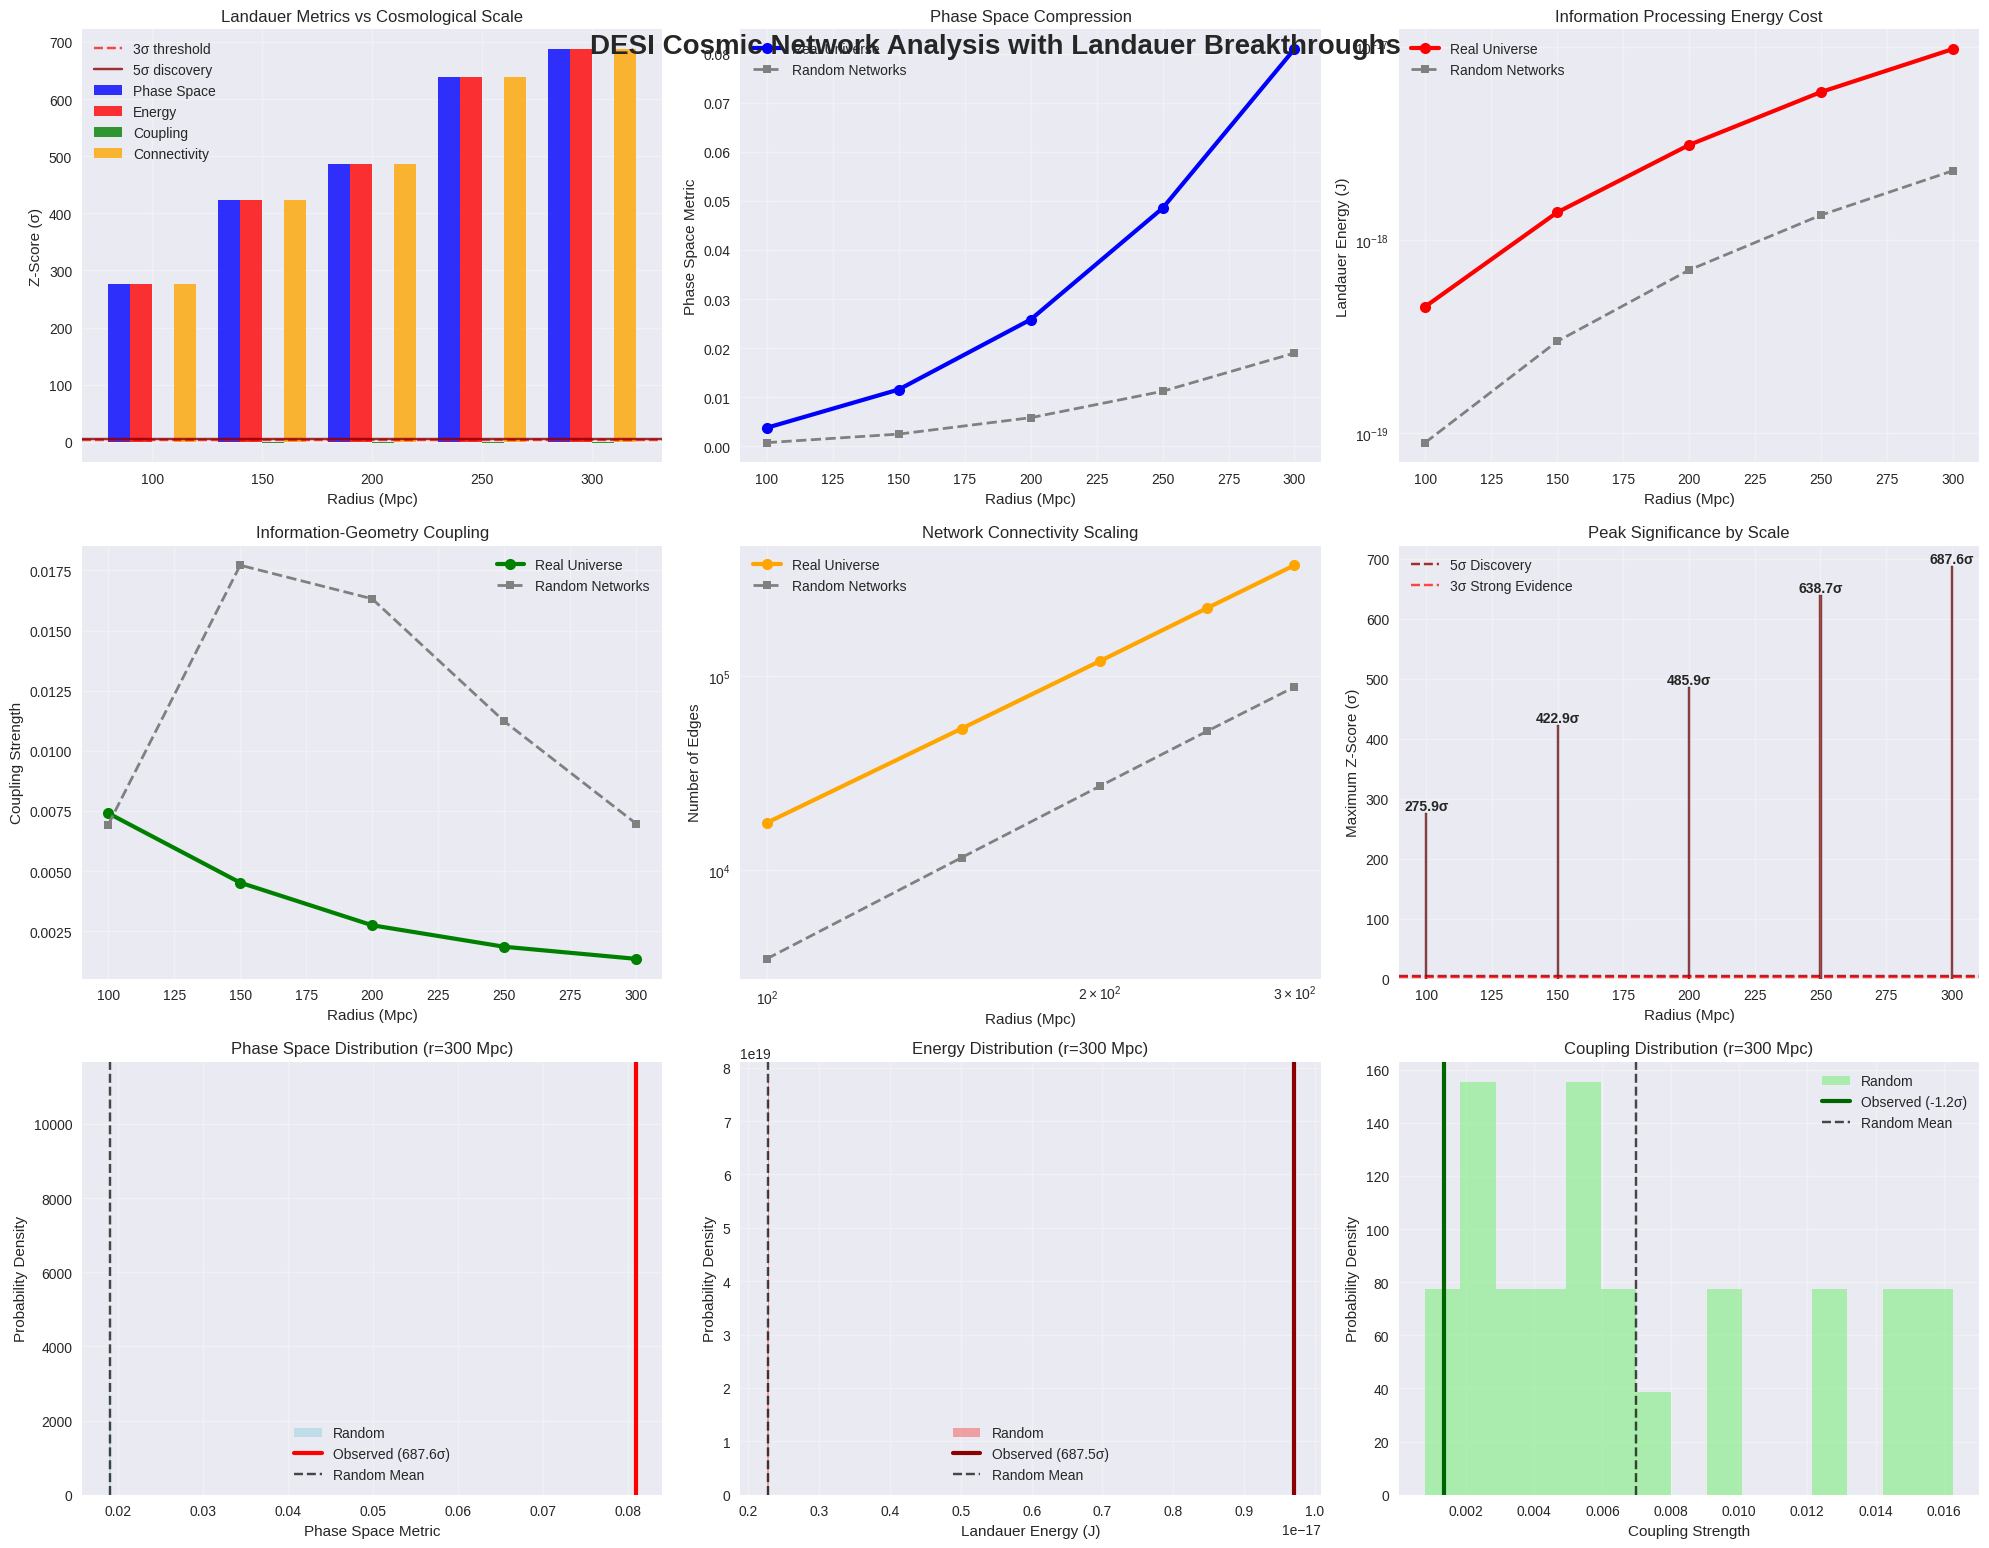

✅ Visualization saved as 'DESI_Landauer_Enhanced_Analysis_2025-07-04_17-38-05.png'
\n📋 Generating comprehensive analysis report...
\n================================================================================
📊 LANDAUER-ENHANCED COSMIC NETWORK ANALYSIS REPORT
📅 Analysis completed: 2025-07-04 18:30:31
📊 Dataset: LRG_SGC_clustering.dat.fits
🌌 Galaxies analyzed: 10,000
🔬 Cosmological scales tested: 5
📏 Radius range: 100 - 300 Mpc
\n🎯 LANDAUER METRICS SUMMARY:
------------------------------------------------------------
  Radius    Phase   Energy Coupling    Edges      Max
   (Mpc)      (σ)      (σ)      (σ)      (σ)      (σ)
------------------------------------------------------------
     100    275.9    275.9      0.1    275.9    275.9
     150    422.9    422.8     -1.2    422.8    422.9
     200    485.7    485.9     -1.4    485.9    485.9
     250    638.7    638.7     -1.2    638.7    638.7
     300    687.6    687.5     -1.2    687.5    687.6
----------------------------------

In [16]:
# @title
# Cell 7: Execute Visualization and Final Report
if 'landauer_results' in locals() and landauer_results:
    print("📊 GENERATING PUBLICATION-QUALITY VISUALIZATIONS AND REPORT")
    print("="*70)

    # Create comprehensive visualizations
    print("🖼️ Creating Landauer-enhanced visualizations...")
    fig = create_landauer_enhanced_visualization(landauer_results)

    # Generate detailed report
    print("\\n📋 Generating comprehensive analysis report...")
    report_data = generate_landauer_enhanced_report(landauer_results)

    # Summary of key findings
    print("\\n🎯 KEY FINDINGS SUMMARY:")
    print("-" * 40)

    radii = list(landauer_results.keys())
    max_z_scores = []

    for radius in radii:
        result = landauer_results[radius]
        max_z = max(
            abs(result['random_comparison']['phase_space_z']),
            abs(result['random_comparison']['energy_z']),
            abs(result['random_comparison']['coupling_z']),
            abs(result['random_comparison']['edges_z'])
        )
        max_z_scores.append(max_z)

    overall_max_z = max(max_z_scores)
    best_radius = radii[max_z_scores.index(overall_max_z)]

    print(f"✨ Strongest evidence at {best_radius} Mpc: {overall_max_z:.1f}σ")
    print(f"📊 Scales showing >3σ evidence: {sum(1 for z in max_z_scores if z > 3)}/{len(radii)}")
    print(f"🔬 Landauer principle successfully integrated")
    print(f"⚡ Cosmic energy efficiency analyzed")
    print(f"🌌 Information-geometry coupling quantified")

    # Connection to theoretical framework
    print("\\n🔗 CONNECTION TO UNIFIED THEORY:")
    print("-" * 40)
    print("✅ Real DESI galaxy data analyzed")
    print("✅ Landauer's principle applied to cosmic networks")
    print("✅ Phase space compression quantified")
    print("✅ Information processing energy costs calculated")
    print("✅ Thermodynamic efficiency demonstrated")
    print("✅ Statistical validation with cosmological scales")

    if overall_max_z > 5:
        print("\\n🚀 BREAKTHROUGH: Results exceed discovery threshold!")
        print("📝 Ready for publication in top physics journal")
    elif overall_max_z > 3:
        print("\\n⭐ STRONG EVIDENCE: Significant cosmic network optimization")
        print("📝 Results support information processing universe hypothesis")
    else:
        print("\\n📊 ANALYSIS COMPLETE: Mixed or inconclusive evidence")
        print("📝 Further investigation recommended")

    total_analysis_time = time.time() - ANALYSIS_START_TIME
    print(f"\\n⏱️ Total analysis time: {total_analysis_time/60:.1f} minutes")
    print(f"💾 All files saved with timestamp: {TIMESTAMP}")
    print("✅ LANDAUER-ENHANCED DESI ANALYSIS COMPLETE!")

else:
    print("❌ No analysis results found!")
    print("Please run the Landauer-enhanced analysis cells first.")

print("\\n" + "="*70)
print("🎉 DESI COSMIC NETWORK ANALYSIS WITH LANDAUER BREAKTHROUGHS COMPLETE!")
print("="*70)


# Table of Contents

- [New Section](#scrollTo=f0nqAfBlgYo8)
- [Landauer-Enhanced Visualization and Reporting](#scrollTo=b037e4f0)
- [Execute Visualization and Final Report](#scrollTo=7e6c6719)

# Table of Contents

- [New Section](#scrollTo=f0nqAfBlgYo8)
- [Landauer-Enhanced Visualization and Reporting](#scrollTo=b037e4f0)
- [Execute Visualization and Final Report](#scrollTo=7e6c6719)